# Energy estimation

Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Average power consumption in each stage of the node

Reading and cleaning CSV files

In [ ]:
sensor_read_df = pd.read_csv('sensor_read.csv', parse_dates=["Timestamp"], index_col="Timestamp")
sensor_read_df["Time"] = (sensor_read_df.index - sensor_read_df.index[0]).total_seconds()
sensor_read_df.set_index('Time', inplace=True)

transmission_power_df = pd.read_csv('transmission_power.csv', parse_dates=["Timestamp"], index_col="Timestamp")
transmission_power_df["Time"] = (transmission_power_df.index - transmission_power_df.index[0]).total_seconds()
transmission_power_df.set_index('Time', inplace=True)

deep_sleep_df = pd.read_csv('deep_sleep.csv', parse_dates=["Timestamp"], index_col="Timestamp")
deep_sleep_df["Time"] = (deep_sleep_df.index - deep_sleep_df.index[0]).total_seconds()
deep_sleep_df.set_index('Time', inplace=True)

Plotting the data

<Axes: title={'center': 'Power Consumption (Deep Sleep - Idle - Wifi On - Idle)'}, xlabel='Time [s]', ylabel='Power [mW]'>

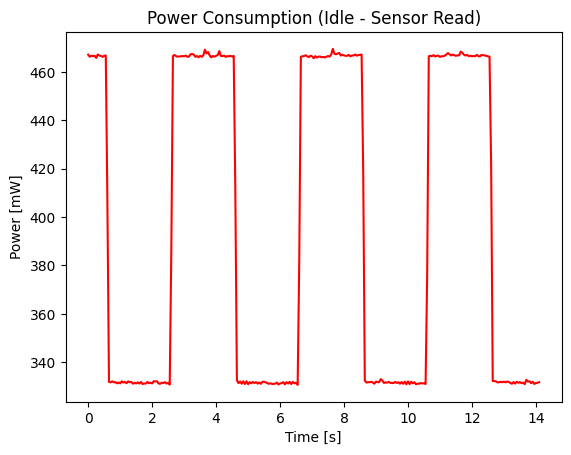

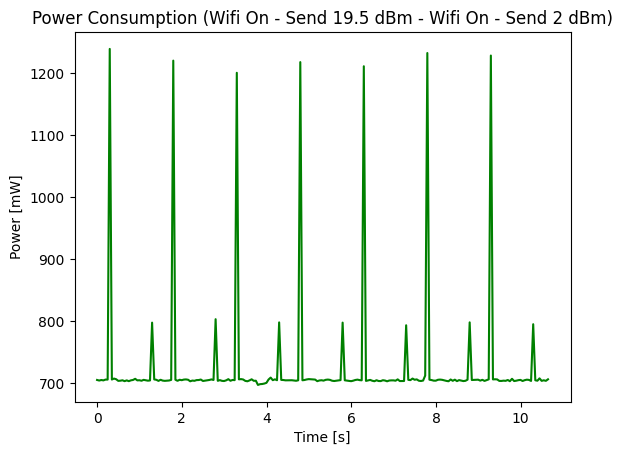

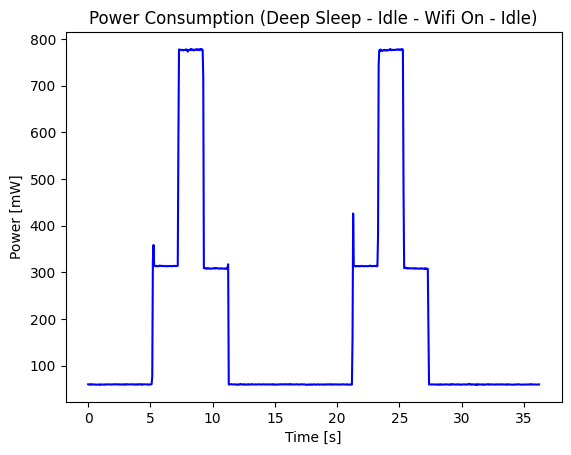

In [3]:
sensor_read_df.plot(
    title="Power Consumption (Idle - Sensor Read)",
    xlabel="Time [s]", ylabel="Power [mW]",
    color="red",
    legend=False)

transmission_power_df.plot(
    title="Power Consumption (Wifi On - Send 19.5 dBm - Wifi On - Send 2 dBm)",
    xlabel="Time [s]", ylabel="Power [mW]",
    color="green",
    legend=False)

deep_sleep_df.plot(
    title="Power Consumption (Deep Sleep - Idle - Wifi On - Idle)",
    xlabel="Time [s]", ylabel="Power [mW]",
    color="blue",
    legend=False)


Calculating averages

In [4]:
DeepSleep_Power = deep_sleep_df[deep_sleep_df < 100].mean().item()  * 1e-3

Idle_Power = pd.concat([sensor_read_df[sensor_read_df < 350], deep_sleep_df[(deep_sleep_df > 300) & (deep_sleep_df < 350)]], ignore_index=True).mean().item() * 1e-3

Sensor_Power = sensor_read_df[sensor_read_df > 450].mean().item() * 1e-3

Wifi_Power = pd.concat([transmission_power_df[transmission_power_df < 750], deep_sleep_df[deep_sleep_df > 700]], ignore_index=True).mean().item() * 1e-3

Transmission2dBm_Power = transmission_power_df[(transmission_power_df > 750) & (transmission_power_df < 850)].mean().item() * 1e-3

Transmission19dBm_Power = transmission_power_df[transmission_power_df > 1150].mean().item() * 1e-3

In [5]:
print(f"Average power consumption in deep sleep: {DeepSleep_Power * 1e3:.2f} mW")
print(f"Average power consumption in idle: {Idle_Power * 1e3:.2f} mW")
print(f"Average power consumption in sensor reading: {Sensor_Power * 1e3:.2f} mW")
print(f"Average power consumption in wifi: {Wifi_Power * 1e3:.2f} mW")
print(f"Average power consumption in transmission at 2dBm: {Transmission2dBm_Power * 1e3:.2f} mW")
print(f"Average power consumption in transmission at 19.5dBm: {Transmission19dBm_Power * 1e3:.2f} mW")

Average power consumption in deep sleep: 59.66 mW
Average power consumption in idle: 320.91 mW
Average power consumption in sensor reading: 466.74 mW
Average power consumption in wifi: 724.58 mW
Average power consumption in transmission at 2dBm: 797.29 mW
Average power consumption in transmission at 19.5dBm: 1221.76 mW


## Average time spent in each stage of the node

Reading and cleaning CSV

In [6]:
timestamps_df = pd.read_csv('timestamps.csv')
timestamps_df = timestamps_df.diff(axis=1).fillna(0).astype(int)
timestamps_df

,PowerOn,Idle,Sensor,Idle.1,Wifi,Transmission,Wifi.1,Idle.2
0,0,437,24021,185,192168,227,5269,161
1,0,413,24021,185,183035,197,5440,161
2,0,453,24018,185,182806,249,5382,161
3,0,453,24019,185,183671,249,5382,161
4,0,453,24006,178,183487,249,5382,161
5,0,350,24015,201,183409,249,5382,161
6,0,453,24004,180,183486,250,5381,161
7,0,445,23962,179,183505,249,5382,161
8,0,455,24021,187,183239,172,5509,163
9,0,455,24021,187,183657,199,5438,163


Calculating durations

In [7]:
Idle_Duration = (timestamps_df["Idle"].mean() + timestamps_df["Idle.1"].mean() + timestamps_df["Idle.2"].mean()) * 1e-6

Sensor_Duration = timestamps_df["Sensor"].mean() * 1e-6

Wifi_Duration = (timestamps_df["Wifi"].mean() + timestamps_df["Wifi.1"].mean()) * 1e-6

Transmission_Duration = timestamps_df["Transmission"].mean() * 1e-6

In [8]:
print(f"Average time spent in idle: {Idle_Duration * 1e6:.2f} us")
print(f"Average time spent in sensor reading: {Sensor_Duration * 1e6:.2f} us")
print(f"Average time spent in wifi: {Wifi_Duration * 1e6:.2f} us")
print(f"Average time spent in transmission: {Transmission_Duration * 1e6:.2f} us")

Average time spent in idle: 777.48 us
Average time spent in sensor reading: 13720.30 us
Average time spent in wifi: 189403.07 us
Average time spent in transmission: 180.10 us


## Average energy consumption of a transmission cycle and battery duration

Given data

In [11]:
# Leader person code = 10811404

DeepSleep_Duration = 4%50 + 5

Battery_Energy = 1404%5000 + 15000

Calculate energy used in each state and compute energy consumption of 1 transmission cycle

In [ ]:
Idle_Energy = Idle_Power * Idle_Duration
Sensor_Energy = Sensor_Power * Sensor_Duration
Wifi_Energy = Wifi_Power * Wifi_Duration
Transmission_Energy = Transmission2dBm_Power * Transmission_Duration
DeepSleep_Energy = DeepSleep_Power * DeepSleep_Duration

Cycle_Energy = Idle_Energy + Sensor_Energy + Wifi_Energy + Transmission_Energy + DeepSleep_Energy

In [13]:
print(f"Average energy consumption in deep sleep: {DeepSleep_Energy * 1e3:.2f} mJ")
print(f"Average energy consumption in idle: {Idle_Energy * 1e3:.2f} mJ")
print(f"Average energy consumption in sensor reading: {Sensor_Energy * 1e3:.2f} mJ")
print(f"Average energy consumption in wifi: {Wifi_Energy * 1e3:.2f} mJ")
print(f"Average energy consumption in transmission: {Transmission_Energy * 1e3:.2f} mJ")
print(f"Estimated energy consumption of 1 transmission cycle: {Cycle_Energy * 1e3:.2f} mJ")

Average energy consumption in deep sleep: 536.95 mJ
Average energy consumption in idle: 0.25 mJ
Average energy consumption in sensor reading: 6.40 mJ
Average energy consumption in wifi: 137.24 mJ
Average energy consumption in transmission: 0.14 mJ
Estimated energy consumption of 1 transmission cycle: 680.98 mJ


Plotting the data

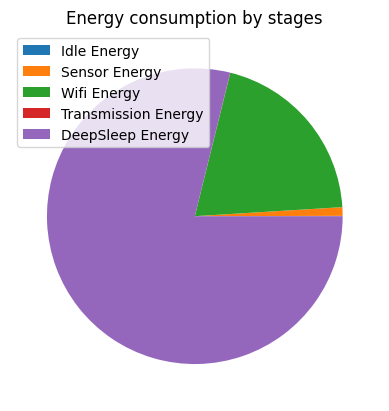

<Axes: title={'center': 'Simulated Cycle (Wifi On - Idle - DeepSleep)'}, xlabel='Time [us]', ylabel='Power [mW]'>

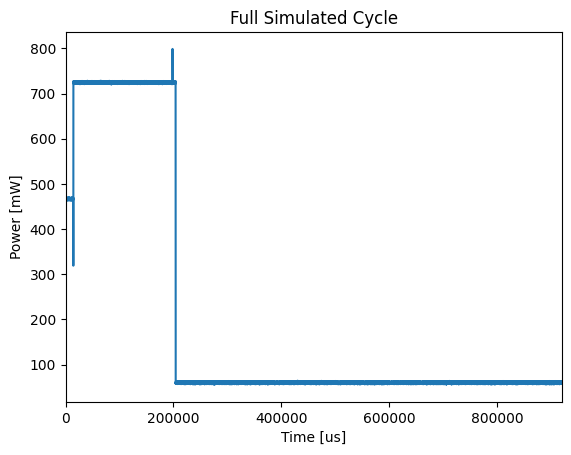

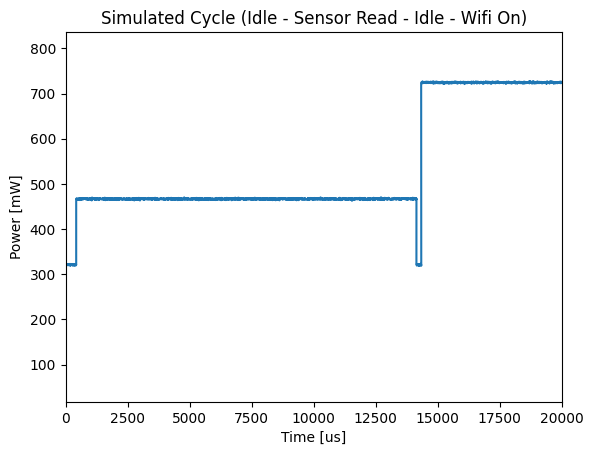

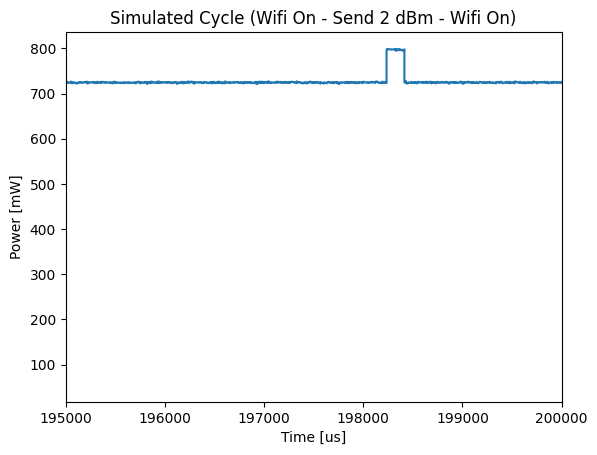

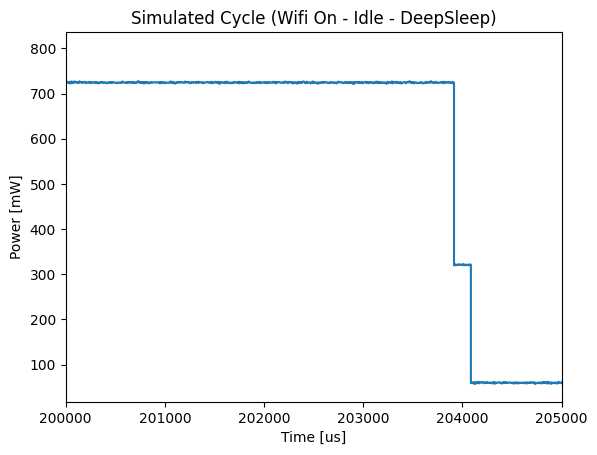

In [14]:
plt.pie([Idle_Energy, Sensor_Energy, Wifi_Energy, Transmission_Energy, DeepSleep_Energy])
plt.legend(['Idle Energy', 'Sensor Energy', 'Wifi Energy', 'Transmission Energy', 'DeepSleep Energy'])
plt.title("Energy consumption by stages")
plt.show()

simulated_cycle_df = pd.read_csv('simulated_cycle.csv', index_col="Time")
simulated_cycle_df.plot(
    title="Full Simulated Cycle",
    xlabel="Time [us]", ylabel="Power [mW]",
    legend=False,
    xlim=(0,920000))

simulated_cycle_df.plot(
    title="Simulated Cycle (Idle - Sensor Read - Idle - Wifi On)",
    xlabel="Time [us]", ylabel="Power [mW]",
    legend=False,
    xlim=(0,20000))

simulated_cycle_df.plot(
    title="Simulated Cycle (Wifi On - Send 2 dBm - Wifi On)",
    xlabel="Time [us]", ylabel="Power [mW]",
    legend=False,
    xlim=(195000,200000))

simulated_cycle_df.plot(
    title="Simulated Cycle (Wifi On - Idle - DeepSleep)",
    xlabel="Time [us]", ylabel="Power [mW]",
    legend=False,
    xlim=(200000, 205000))

Calculate amount of time before changing the battery

In [15]:
Cycle_Number = Battery_Energy // Cycle_Energy

Cycle_Duration = Idle_Duration + Sensor_Duration + Wifi_Duration + Transmission_Duration + DeepSleep_Duration

Battery_Duration = Cycle_Number * Cycle_Duration

In [16]:
print("Estimated battery duration:")
print(f"{Cycle_Number:.0f} full cycles")
print(f"{Battery_Duration:.2f} seconds")
print(f"{Battery_Duration / 60:.2f} hours")
print(f"{Battery_Duration / (60*24):.2f} days")

Estimated battery duration:
24088 full cycles
221707.90 seconds
3695.13 hours
153.96 days


## Some possible improvements

Since idle and transmissione energy are unrelevant, i doubt there is improvemnets in that areas (no code optimizazion, minimum transmission power)

Improve Wifi energy:
- Transmit state only when changed to reduce average wifi use (do some calculations)

Improve Sensor energy:
- Different sensor with lower energy consumption

Improve deep sleep energy:
- Different/Dynamic period, no need to check the park every 9 seconds so consider longer or dynamic sleep duration (do some calculations)

Other useful improvements
- Different transmission technology
- Activation sensor

Transmit state only when changed (i will not change the code for the purpose of this simulation but i will simplyhalf wifi+transmission duration so 50% of the time there is a state change)

In [20]:
Cycle_Energy = Idle_Energy + Sensor_Energy + (Wifi_Energy + Transmission_Energy)/2 + DeepSleep_Energy

Cycle_Number = Battery_Energy // Cycle_Energy

Cycle_Duration = Idle_Duration + Sensor_Duration + (Wifi_Duration + Transmission_Duration)/2 + DeepSleep_Duration

Battery_Duration = Cycle_Number * Cycle_Duration

print(f"Estimated battery duration when trasmitting only state changes:")
print(f"{Cycle_Number:.0f} full cycles")
print(f"{Battery_Duration:.2f} seconds")
print(f"{Battery_Duration / 60:.2f} hours")
print(f"{Battery_Duration / (60*24):.2f} days\n")

Estimated battery duration when trasmitting only state changes:
26791 full cycles
244046.97 seconds
4067.45 hours
169.48 days



Different Deep Sleep Duration

In [22]:
for Different_DeepSleep_Duration in [15, 30, 60, 300, 600, 900, 1800, 3600]:
    Different_DeepSleep_Energy = DeepSleep_Power * Different_DeepSleep_Duration

    Cycle_Energy = Idle_Energy + Sensor_Energy + Wifi_Energy + Transmission_Energy + Different_DeepSleep_Energy

    Cycle_Number = Battery_Energy // Cycle_Energy

    Cycle_Duration = Idle_Duration + Sensor_Duration + Wifi_Duration + Transmission_Duration + Different_DeepSleep_Duration

    Battery_Duration = Cycle_Number * Cycle_Duration

    print(f"Estimated battery duration for {Different_DeepSleep_Duration} seconds deep sleep duration:")
    print(f"{int(Cycle_Number)} full cycles")
    print(f"{Battery_Duration:.2f} seconds")
    print(f"{Battery_Duration / 60:.2f} hours")
    print(f"{Battery_Duration / (60*24):.2f} days\n")

Estimated battery duration for 15 seconds deep sleep duration:
15789 full cycles
240057.23 seconds
4000.95 hours
166.71 days

Estimated battery duration for 30 seconds deep sleep duration:
8482 full cycles
256191.01 seconds
4269.85 hours
177.91 days

Estimated battery duration for 60 seconds deep sleep duration:
4405 full cycles
265198.98 seconds
4419.98 hours
184.17 days

Estimated battery duration for 300 seconds deep sleep duration:
909 full cycles
272885.51 seconds
4548.09 hours
189.50 days

Estimated battery duration for 600 seconds deep sleep duration:
456 full cycles
273693.06 seconds
4561.55 hours
190.06 days

Estimated battery duration for 900 seconds deep sleep duration:
304 full cycles
273662.04 seconds
4561.03 hours
190.04 days

Estimated battery duration for 1800 seconds deep sleep duration:
152 full cycles
273631.02 seconds
4560.52 hours
190.02 days

Estimated battery duration for 3600 seconds deep sleep duration:
76 full cycles
273615.51 seconds
4560.26 hours
190.01 days